# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [35]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('/airbnb_hw.csv')

In [36]:
##Part 1
airbnb['Price'].unique()
airbnb['Price'] = airbnb['Price'].astype(str).str.replace(',','').astype(int)
airbnb['Price'].unique()
#To clean this variable, I first transformed the data into the datatype string, and then replaced the commas (that appear after the thousands digit) with nothing, and transformed the
#data back to integers

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [61]:
#Part 2
mn = pd.read_csv('/mn_police_use_of_force.csv')
mn['subject_injury']=mn['subject_injury'].fillna('n/a')
mn['subject_injury'].value_counts(normalize=True)
#76% of cases have n/a, which is highly concerning
pd.crosstab(mn['subject_injury'],mn['force_type'])
#Data is always missing under the "less lethal" and "maximal Restraint Technique" categories of force, never missing under "Firearm",
# and oftentimes missing for all other cases, especially "Bodily force," and "Chemical Irritant"
#It is less often, but still a significant minority, missing from "Gun Point Display"

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
n/a,2,7051,1421,0,27,74,87,0,170,31,985


In [71]:
#Part 3
pretrial = pd.read_parquet('/justice_data.parquet')
pretrial['WhetherDefendantWasReleasedPretrial'].value_counts()
pretrial['WhetherDefendantWasReleasedPretrial'] = pretrial['WhetherDefendantWasReleasedPretrial'].replace(9,np.nan)
pretrial['WhetherDefendantWasReleasedPretrial'].value_counts()


,count
WhetherDefendantWasReleasedPretrial,
1.0,19154
0.0,3801


In [93]:
#Part 4
pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False)

pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False)
pd.crosstab(pretrial['ImposedSentenceAllChargeInContactEvent'],pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'])
#All examples of ImposedSentenceAllChargeInContactEvent being empty occur when SentenceTypeAllChargesAtConvictionInContactEvent is either "Other, all charges in cohort contact resulted in pending, dismissed,
#deferred, etc" or "Not applicable (e.g., disposition record not found, or unknown)," both of which would carry zero length of prison
pretrial.loc[ pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([4, 9]),'ImposedSentenceAllChargeInContactEvent'] = 0
pretrial['ImposedSentenceAllChargeInContactEvent']=pretrial['ImposedSentenceAllChargeInContactEvent'].astype(float)
pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts()

,count
ImposedSentenceAllChargeInContactEvent,
0.000000,14006
12.000000,1404
0.985626,1051
6.000000,809
3.000000,787
...,...
2.197125,1
21.164271,1
1.657084,1


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [135]:
#part 1
shark = pd.read_excel('/GSAF5.xls')
shark.head()
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7070 non-null   object 
 1   Year            7068 non-null   float64
 2   Type            7052 non-null   object 
 3   Country         7020 non-null   object 
 4   State           6583 non-null   object 
 5   Location        6503 non-null   object 
 6   Activity        6485 non-null   object 
 7   Name            6851 non-null   object 
 8   Sex             6491 non-null   object 
 9   Age             4075 non-null   object 
 10  Injury          7035 non-null   object 
 11  Fatal Y/N       6509 non-null   object 
 12  Time            3543 non-null   object 
 13  Species         3939 non-null   object 
 14  Source          7050 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [136]:
#part2
shark = shark.drop(shark.columns[[21, 22]], axis=1)

In [137]:
shark.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7070 non-null   object 
 1   Year            7068 non-null   float64
 2   Type            7052 non-null   object 
 3   Country         7020 non-null   object 
 4   State           6583 non-null   object 
 5   Location        6503 non-null   object 
 6   Activity        6485 non-null   object 
 7   Name            6851 non-null   object 
 8   Sex             6491 non-null   object 
 9   Age             4075 non-null   object 
 10  Injury          7035 non-null   object 
 11  Fatal Y/N       6509 non-null   object 
 12  Time            3543 non-null   object 
 13  Species         3939 non-null   object 
 14  Source          7050 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

<Axes: >

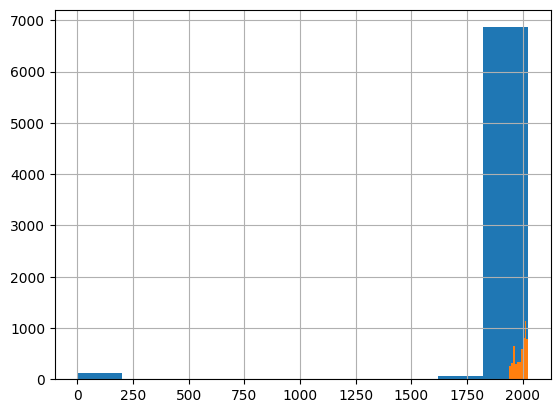

In [138]:
#Part 3
shark['Year'].dtype
shark['Year'].hist()
#There are a few entries from before the year 1500, which doesnt seem very likely that there are actual datapoints from then
shark1 =shark.loc[shark['Year']>1940]
shark1['Year'].hist()
#Shark Attacks are increasing

<Axes: >

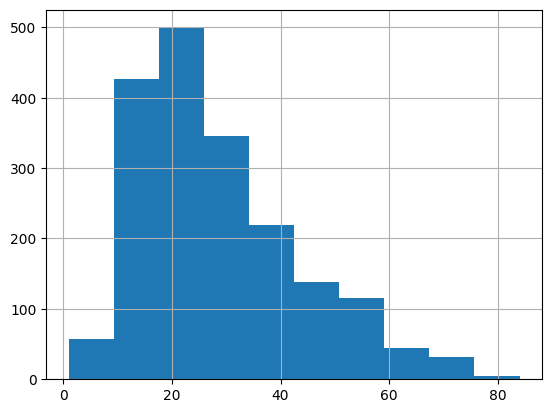

In [148]:
#part 4
shark1['Age'].value_counts()
shark1['Age'].unique()
shark1 = shark1.loc[shark1['Age'].isin(range(0,100))]
shark1['Age'].hist()


In [154]:
#part 5
shark1['Sex'].value_counts(normalize=True)
shark1['Sex'] = shark1['Sex'].astype(str).str.strip().str.upper()
shark1.loc[~shark1['Sex'].isin(['M', 'F']), 'Sex'] = np.nan
shark1['Sex'].value_counts(normalize=True)
#.849249 of the victims are male


,proportion
Sex,
M,0.849249
F,0.150751


In [160]:
#Part 6
shark1['Type'].unique()
shark1['Type'].value_counts()
shark1.loc[~shark1['Type'].isin(['Unprovoked','Provoked']), ['Type']] = "Unknown"
shark1['Type'].value_counts(normalize=True)
#0.858586 of attacks are unprovoked

,proportion
Type,
Unprovoked,0.858586
Provoked,0.074960
Unknown,0.066454


In [177]:
#Part 7
shark1['Fatal Y/N'].value_counts()
shark1['Fatal Y/N'] = shark1['Fatal Y/N'].astype(str).str.upper().str.strip()
shark1['Fatal Y/N'].value_counts()
shark1.loc[~shark1['Fatal Y/N'].isin(['Y','N']), ['Fatal Y/N']] = "Unknown"
shark1['Fatal Y/N'].value_counts()


,count
Fatal Y/N,
N,1491
Y,313
Unknown,77


In [184]:
#Part8
pd.crosstab(shark1['Sex'],shark1['Type'])
#Men are more likely to be attacked unprovoked
pd.crosstab(shark1['Fatal Y/N'],shark1['Type'], normalize = 'columns')
#Attacks are more likely to be fatal when it is unprovoked, ~2% when Provoked and ~18% when Unprovoked
pd.crosstab(shark1['Sex'],shark1['Fatal Y/N'], normalize = 'index')
#It is sligtly more likely to be fatal for men (F~16% & M~16.7%)

#I like sharks, but I wouldn't want to see one in the water with me, especially the dangerous ones, although I've petted non-dangerous ones before. Whale sharks are awesome.

Fatal Y/N,N,Unknown,Y
Sex,,,
F,0.790036,0.049822,0.160142
M,0.794062,0.038534,0.167404


In [202]:
#Part 9
shark1['Species '].unique()
shark1['GW'] = shark1['Species '].str.lower().str.contains('white shark', na=False)
pd.crosstab(shark1['GW'],shark1['Fatal Y/N'], normalize = "columns")
#Great whites make up 0.268371 of fatal attacks

Fatal Y/N,N,Unknown,Y
GW,,,
False,0.856472,1.0,0.731629
True,0.143528,0.0,0.268371


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

It is about tidying data, an important part of data cleaning that ensures each variable is a column, each row an observation, and each type of observational unit is a table
   
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

It is designed to help with initial exploration and to simplify development of data analysis tools.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence is describing how tidying a dataset makes it similar to every other tidy set, since there are specific and replicatable processes to tidy a dataset, while every original data source has it own messy quirks. The second sentence is refering to the fact that variables and observations often blend together, impacting one another.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values- Numbers or Strings that contain information

Variables- Contains all values that measure the same underlying attribute

Observations- All values measured on the same unit across attributes

  5. How is "Tidy Data" defined in section 2.3?

  A standard way of mapping the meaning of a dataset to its structure in which each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

Column headers are values, not variable names, multiple variables in one column, variables stored in both rows and columns, multiple types of observational units are stored in the same table, and a stingle observational unit is stored in multiple tables. In table four, it treats religion as a observation instead of a variable, and frequency as a value rather than a variable. Melting a dataset means rather than using a matrix of 2 dimensions to have to search for a value, it makes each row assigned to its respective value

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

In Table 10 you must search through both the rows and columns to find the specific value you are looking for, each day as treated as its own variable rather than a observation of date. In table 12, each observation of the combination of ID and date has its own row.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The chicken and the egg problem is that if tidy data is useful because of the tools that are abled to be used by it, then the tools will also be linked to tidy data, meaning it will be hard to find improvement in one thing or the other if it would negatively impact the other part and make data wrangling harder. He hopes that people will build off the framework he has created to make it more efficient and applicable